<a href="https://colab.research.google.com/github/Muhirwakyeyune/Machine-Learning-projects/blob/main/KNN(K_nearest_neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by Muhirwa Salomon

K-Nearest Neighbor (KNN) is a simple and effective machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, meaning that it does not make any assumptions about the underlying distribution of the data.

KNN works by finding the K closest data points in the training set to a given input data point and using the class (in classification) or average value (in regression) of those K points to predict the class or value of the input data point.

KNN is a useful algorithm because it is easy to understand and implement, and it can be effective in a wide range of applications. It can work well with both small and large datasets, and it is especially useful when there is not a lot of prior information about the distribution of the data.

The factor K represents the number of neighbors that are considered when making a prediction. Choosing the right value for K is important because it can greatly affect the performance of the algorithm. If K is too small, the algorithm may be overly sensitive to noise in the data, leading to poor generalization performance. On the other hand, if K is too large, the algorithm may oversimplify the problem and miss important patterns in the data.

There are various techniques for choosing the optimal value of K, including using cross-validation and grid search. In general, the best value for K depends on the specific problem at hand and the characteristics of the dataset.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification

In [95]:

#Load the iris dataset from sklearn
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)
X.shape


(100, 2)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    # Computes the Euclidean distance between two points.
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        # Initializes the KNN classifier with a default value of k=3.
        self.k = k
        
    def fit(self, X, y):
        # Stores the training data and labels.
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        # Predicts the labels for a set of input samples.
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # Predicts the label for a single input sample.
        
        # Computes the Euclidean distances between the input sample and all the training samples.
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Gets the indices of the k nearest neighbors.
        k_indices = np.argsort(distances)[:self.k]
        
        # Gets the labels of the k nearest neighbors.
        k_labels = [self.y_train[i] for i in k_indices]
        
        # Finds the most common label among the k nearest neighbors.
        most_common = Counter(k_labels).most_common(1)
        
        # Returns the predicted label.
        return most_common[0][0]
    
    def accuracy(self, X_test, y_test):
        # Computes the accuracy of the classifier on a test set.
        y_pred = self.predict(X_test)
        return np.sum(y_pred == y_test) / len(y_test)
    def plot_decision_boundary(self, X, y):
        # Create a meshgrid over the feature space of the input data
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        
        # Predict the class for each point on the meshgrid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the meshgrid and color each point according to the predicted class
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
        plt.title("KNN (k = {})".format(self.k))
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

In [98]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # Load the iris dataset
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a KNN classifier and fit it to the training data
# knn = KNN(k=3)
# knn.fit(X_train, y_train)

# # Calculate the accuracy of the model on the test set
# accuracy = knn.accuracy(X_test, y_test)
# print(f"Accuracy: {accuracy:.2f}")


In this implementation, we have defined the euclidean_distance function to calculate the Euclidean distance between two points, and the KNN class with fit and predict methods. The fit method simply stores the training data, and the predict method calls the _predict method for each test data point. The _predict method calculates the distances between the test point and all training points, selects the k closest points, and returns the most common class label among those points.



In [99]:
knn = KNN(k=5)
knn.fit(X_train, y_train)


In [100]:
y_pred = knn.predict(X_test)


In [101]:
accuracy = knn.accuracy(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


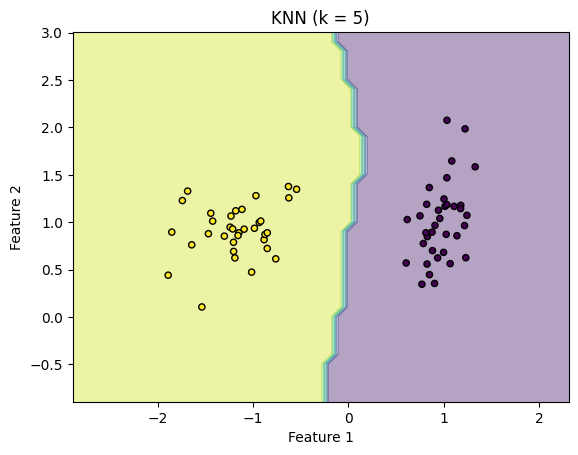

In [102]:
# Plot the decision boundary for the KNN classifier
knn.plot_decision_boundary(X_train, y_train)